# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets

my_btc= 1.2
my_eth= 5.3
   

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

eth_url = eth_url + "?format=json"
requests.get(eth_url)
store_eth_url = requests.get(eth_url)
#dir(store_btc_url) # will list all the info
data_eth_url = store_eth_url.json()
data_eth_url

btc_url = btc_url + "?format=json"
requests.get(btc_url)
store_btc_url = requests.get(btc_url)
#dir(store_btc_url) # will list all the info
data_btc_url = store_btc_url.json()
data_btc_url

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18665506,
   'total_supply': 18665506,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 55067.0,
     'volume_24h': 53400340503,
     'market_cap': 1028394392444,
     'percentage_change_1h': 0.40586372418753,
     'percentage_change_24h': 4.39898016294961,
     'percentage_change_7d': -5.45349536820312,
     'percent_change_1h': 0.40586372418753,
     'percent_change_24h': 4.39898016294961,
     'percent_change_7d': -5.45349536820312}},
   'last_updated': 1616821317}},
 'metadata': {'timestamp': 1616821317,
  'num_cryptocurrencies': 1329,
  'error': None}}

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_url = btc_url + "?format=json"
requests.get(btc_url)
store_btc_url = requests.get(btc_url)
#dir(store_btc_url) # will list all the info
data_btc_url = store_btc_url.json()
data_btc_url

#print(store_btc_url.content) # only select the content from listed info and print

# Fetch current ETH price


eth_url = eth_url + "?format=json"
requests.get(btc_url)
store_eth_url = requests.get(eth_url)
#dir(store_btc_url) # will list all the info
data_eth_url = store_eth_url.json()
data_eth_url

#print(store_btc_url.content) # only select the content from listed info and print


# Compute current value of my crpto

# YOUR CODE HERE!
my_btc_value = 57821.0 *my_btc
my_eth_value = 1803.62 *my_eth
total_crypto_value = my_btc_value + my_eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69385.20
The current value of your 5.3 ETH is $9559.19


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
amount_of_shares = 50
amount_of_bonds = 200 # AGG bond

In [8]:
# Set Alpaca API key and secret
api_key = os.getenv("APCA_API_KEY_ID")
api_secret = os.getenv("APCA_API_SECRET_KEY")
base_url = os.getenv("APCA_API_BASE_URL")

# Create the Alpaca API object
alpaca = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-19", tz = "America/New_York").isoformat()
                                                             #what is get barset
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portofolio = alpaca.get_barset(tickers, timeframe, start=today , end =today).df

# Preview DataFrame
portofolio

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [10]:
# Pick AGG and SPY close prices

price_spy = portofolio['SPY']
closing_prices_spy =price_spy['close']
spy_close_price =closing_prices_spy.loc[pd.to_datetime('2021-03-19')]

price_agg = portofolio['AGG']
closing_prices_agg =price_agg['close']
agg_close_price =closing_prices_agg.loc[pd.to_datetime('2021-03-19')]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [11]:
# Compute the current value of shares
my_spy = 50
my_agg = 200 # AGG bond
total_spy_stock_value = spy_close_price *50
total_agg_bond_value =agg_close_price*200
total_share_value = total_spy_stock_value +total_agg_bond_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${total_spy_stock_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${total_agg_bond_value:0.2f}")
#total_shares_value =print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")+print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [12]:
# Set monthly household income


# Create savings DataFrame,
#df_data={" ":["crypto","shares"],'amount':[16727,23889]}

shares = total_share_value
crypto = total_crypto_value

df_data=pd.DataFrame([('', crypto),
                   ('', shares)],
                  index=['crypto', 'shares'],
                  columns=('', 'amount'))

df_savings = pd.DataFrame(data=df_data)
# Display savings DataFrame
display(df_savings)

#df.reset_index(drop=True, inplace=True)


,,amount
crypto,,78944.386
shares,,42175.000


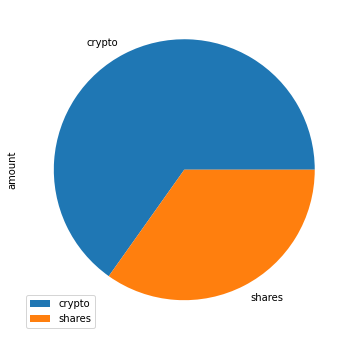

In [13]:
# Plot savings pie chart
plot = df_savings.plot.pie(y='amount', figsize=(6, 6))

In [14]:
# Set ideal emergency fund
monthly_income = 12000
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_of_saving = shares + crypto

# Validate saving health
if total_amount_of_saving > emergency_fund:
    print ("congratulating the person for having enough money in this fund")
elif total_amount_of_saving == emergency_fund:
    print("congratulating the person on reaching this financial goal.")
else:
    print("your emergency_fund is less than 3 times your monthly income") # ???????????????????????????

congratulating the person for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date , end =end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207  
2016-08-24 00:00:00-04:00  218.82  218.91  217.36  217.88  50310103

##### Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [22]:
# Printing the simulation input data
# YOUR CODE HERE!

portofolio_2 = alpaca.get_barset(tickers, timeframe, start=2020-3-18 , end =today).df

MC_30years = MCSimulation(
portfolio_data = df_stock_data,
weights = [.60, .40],
num_simulation = 500,
num_trading_days = 252*30)


In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006323,1.002818,0.996949,1.004605,1.005996,0.999326,1.003911,0.998545,1.003842,1.006165,...,0.986241,1.010664,1.003678,1.005445,1.002080,0.999811,0.993295,1.002730,0.990216,1.004135
2,1.007854,1.004097,0.995538,1.007009,0.998938,1.001794,0.993671,0.988012,1.006025,1.007999,...,0.989149,1.004007,1.006331,1.002872,1.001201,1.009794,0.985433,1.005977,0.990011,1.001030
3,1.009197,1.009408,0.994957,1.002205,1.005112,1.006294,1.000615,0.992177,1.008698,1.015101,...,0.980279,0.998470,1.006493,0.991181,1.015515,1.015742,0.989624,1.008354,0.994735,0.995134
4,1.001988,1.004926,1.003092,1.001689,1.009169,1.005594,0.994128,0.983089,0.999045,1.009107,...,0.975996,0.998820,1.005823,0.988320,1.013129,1.025062,0.988029,1.009491,0.995549,0.998304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.231905,5.324806,5.989194,5.934925,7.094684,18.332085,2.916147,4.881422,3.534811,2.306137,...,7.643249,3.281711,9.800019,6.795060,4.882588,4.537487,5.787952,17.471060,8.488538,5.234765
7557,7.278813,5.346540,5.937991,5.906190,6.994234,18.309517,2.907462,4.872294,3.517505,2.303259,...,7.746396,3.291183,9.811563,6.838110,4.903677,4.507700,5.761466,17.386991,8.492665,5.232261
7558,7.310340,5.356295,5.893552,5.895977,7.045938,18.384917,2.932940,4.899104,3.527493,2.294695,...,7.760557,3.278137,9.831467,6.855828,4.866963,4.509598,5.719672,17.341325,8.558412,5.235878
7559,7.300235,5.316319,5.946118,5.852530,7.070536,18.265992,2.939249,4.929932,3.534632,2.295017,...,7.774321,3.308520,9.837216,6.910722,4.872899,4.483741,5.678994,17.396210,8.605124,5.199044


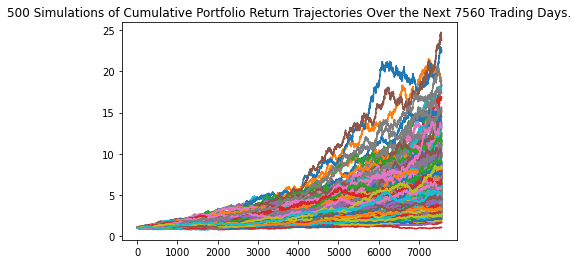

In [25]:
# Plot simulation outcomes
MC_30years_plot = MC_30years.plot_simulation()

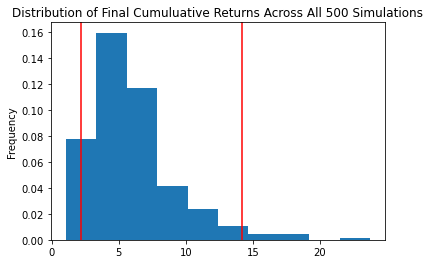

In [26]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
#spy_daily_return = closing_prices_spy.pct_change()
#agg_daily_return = closing_prices_agg.pct_change()
#spy_daily_return.head(10)
dist_plot = MC_30years.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
table = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(table)

count           500.000000
mean              6.061059
std               3.205234
min               1.047642
25%               3.881784
50%               5.313687
75%               7.290129
max              23.747453
95% CI Lower      2.179481
95% CI Upper     14.201111
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000
ci_lower= round(table[8]*initial_investment)
ci_upper=round(table[9]*initial_investment)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
print(table_lower)
print(table_upper)
 #Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

43590
284022
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43590 and $284022


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment_50 = 20000 * 1.5

ci_lower_50= round(table[8]*initial_investment_50)
ci_upper_50=round(table[9]*initial_investment_50)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_50} and ${ci_upper_50}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65384 and $426033


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")